In [1]:
import pandas as pd

import matplotlib as plt

In [2]:
df= pd.read_csv("telecom.csv")

df

df.columns


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
#checking missing values

missing_val=df.isnull().sum()

missing_val

#handling missing values by replacing with mean

mean_val=df["Total eve charge"].mean()
df["Total eve charge"].fillna(mean_val, inplace=True)



In [8]:
#Standardizing the data

df['International plan'] = df['International plan'].str.lower()

df['Voice mail plan'] = df['Voice mail plan'].str.lower()

unique_values = df['Churn'].unique()
print(unique_values)


[False  True]


In [9]:
# Replace 'False' with 0 and 'True' with 1 in the 'churn' column
df['Churn'] = df['Churn'].map({False: 0, True: 1})

df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,no,no,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,no,no,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,no,yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
663,AL,106,408,no,yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
664,VT,60,415,no,no,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
665,WV,159,415,no,no,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [10]:
#Identify the outliers
#using iqr method
col_check="Total day calls"

Q1=df[col_check].quantile(0.25)
Q3=df[col_check].quantile(0.75)

IQR= Q3-Q1

lower_bound=Q1 - 1.5*IQR
upper_bound=Q3 + 1.5*IQR

outliers=df[(df[col_check] < lower_bound) | (df[col_check] > upper_bound)]

outliers

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
91,AZ,86,415,no,yes,32,70.9,163,12.05,166.7,121,14.17,244.9,105,11.02,11.1,5,3.00,3,0
238,MI,91,415,no,no,0,154.4,165,26.25,168.3,121,14.31,239.9,81,10.80,11.7,4,3.16,5,1
243,NH,155,408,no,no,0,216.7,30,36.84,144.3,125,12.27,135.3,106,6.09,10.8,1,2.92,2,0
411,MT,124,415,no,yes,30,144.5,35,24.57,262.3,101,22.30,226.5,82,10.19,12.0,7,3.24,2,0
630,WV,58,408,no,yes,39,211.9,40,36.02,274.4,76,23.32,210.5,139,9.47,5.4,4,1.46,1,0


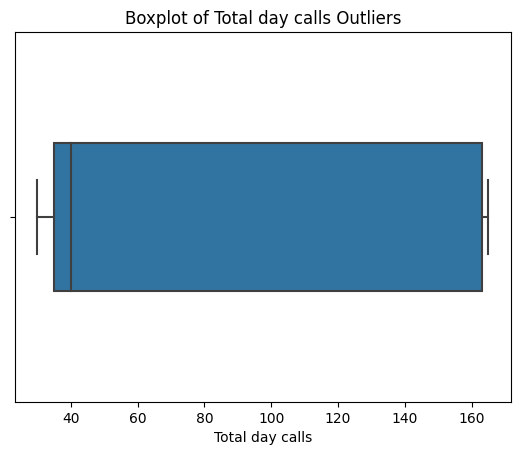

In [11]:
# Create a boxplot for the identified outliers
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=outliers["Total day calls"], width=0.4)
plt.title(f'Boxplot of {"Total day calls"} Outliers')
plt.xlabel("Total day calls")
plt.show()

In [13]:
#feature engineering
# Create a feature 'total_calls' by summing up the day, evening, and night calls
df['Total_calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']

# Create a feature 'total_charge' by summing up the day, evening, and night charges
df['Total_charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

# Create a feature 'total_calls_per_charge' by calculating calls per charge
df['Total_calls_per_charge'] = df['Total_calls'] / df['Total_charge']

df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_calls,total_charge,Total_calls,Total_charge,Total_calls_per_charge
0,LA,117,408,no,no,0,184.5,97,31.37,351.6,...,8.7,4,2.35,1,0,267,70.97,267,70.97,3.762153
1,IN,65,415,no,no,0,129.1,137,21.95,228.5,...,12.7,6,3.43,4,1,331,50.77,331,50.77,6.519598
2,NY,161,415,no,no,0,332.9,67,56.59,317.8,...,5.4,9,1.46,4,1,292,90.83,292,90.83,3.214797
3,SC,111,415,no,no,0,110.4,103,18.77,137.3,...,7.7,6,2.08,2,0,310,38.97,310,38.97,7.954837
4,HI,49,510,no,no,0,119.3,117,20.28,215.1,...,11.1,1,3.00,1,0,316,46.60,316,46.60,6.781116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,no,yes,26,137.1,88,23.31,155.7,...,11.5,7,3.11,2,0,307,47.68,307,47.68,6.438758
663,AL,106,408,no,yes,29,83.6,131,14.21,203.9,...,8.1,3,2.19,1,0,335,41.87,335,41.87,8.000955
664,VT,60,415,no,no,0,193.9,118,32.96,85.0,...,13.2,8,3.56,3,0,362,49.64,362,49.64,7.292506
665,WV,159,415,no,no,0,169.8,114,28.87,197.7,...,11.6,4,3.13,1,0,301,54.39,301,54.39,5.534106
